## Analysis notebook

This is a generic analysis notebook that can be used to plot the different figures in the DeepGreen paper. Plots are shown for each of the different figure types using the examples in the paper. In general, load an experiment with the Experiment class, then provide the experiment to the different plotting functions. The plotting functions use the matplotlib pyplot interface to generate figures.

In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np


import matplotlib.pyplot as plt

from Experiment import Experiment, Experiment2D
from figure_functions import compute_rolling_average, prediction_compare_plot, latent_space_plot, loss_boxplot
from figure_functions import training_loss_epochs_plot, waterfall_plot, generate_GL_plot, generate_G_plot, summary_boxplot
from figure_functions import get_plot_options
from figure_functions import prediction_compare_plot2D
import sys
sys.path.append("architecture")
from GreenNet import GreenNet
from NormalizedMeanSquaredError import NormalizedMeanSquaredError as NMSE


full_params, half_params = get_plot_options()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# How to load up the different experiments for analysis
s0 = Experiment(experiment_name="Sys0-Paper-Experiment", data_file_prefix='S0-Oscillator')
s1 = Experiment(experiment_name="Sys1-Paper-Experiment", data_file_prefix='S1-NLSL1')
#s2 = Experiment(experiment_name="Sys2-Paper-Experiment", data_file_prefix='S2-NLSL2')

# In general we'll use the "System 0" basic example system data for plotting the figure below
# although you could set s1, s2, or any other experiment here:
expt = s0

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


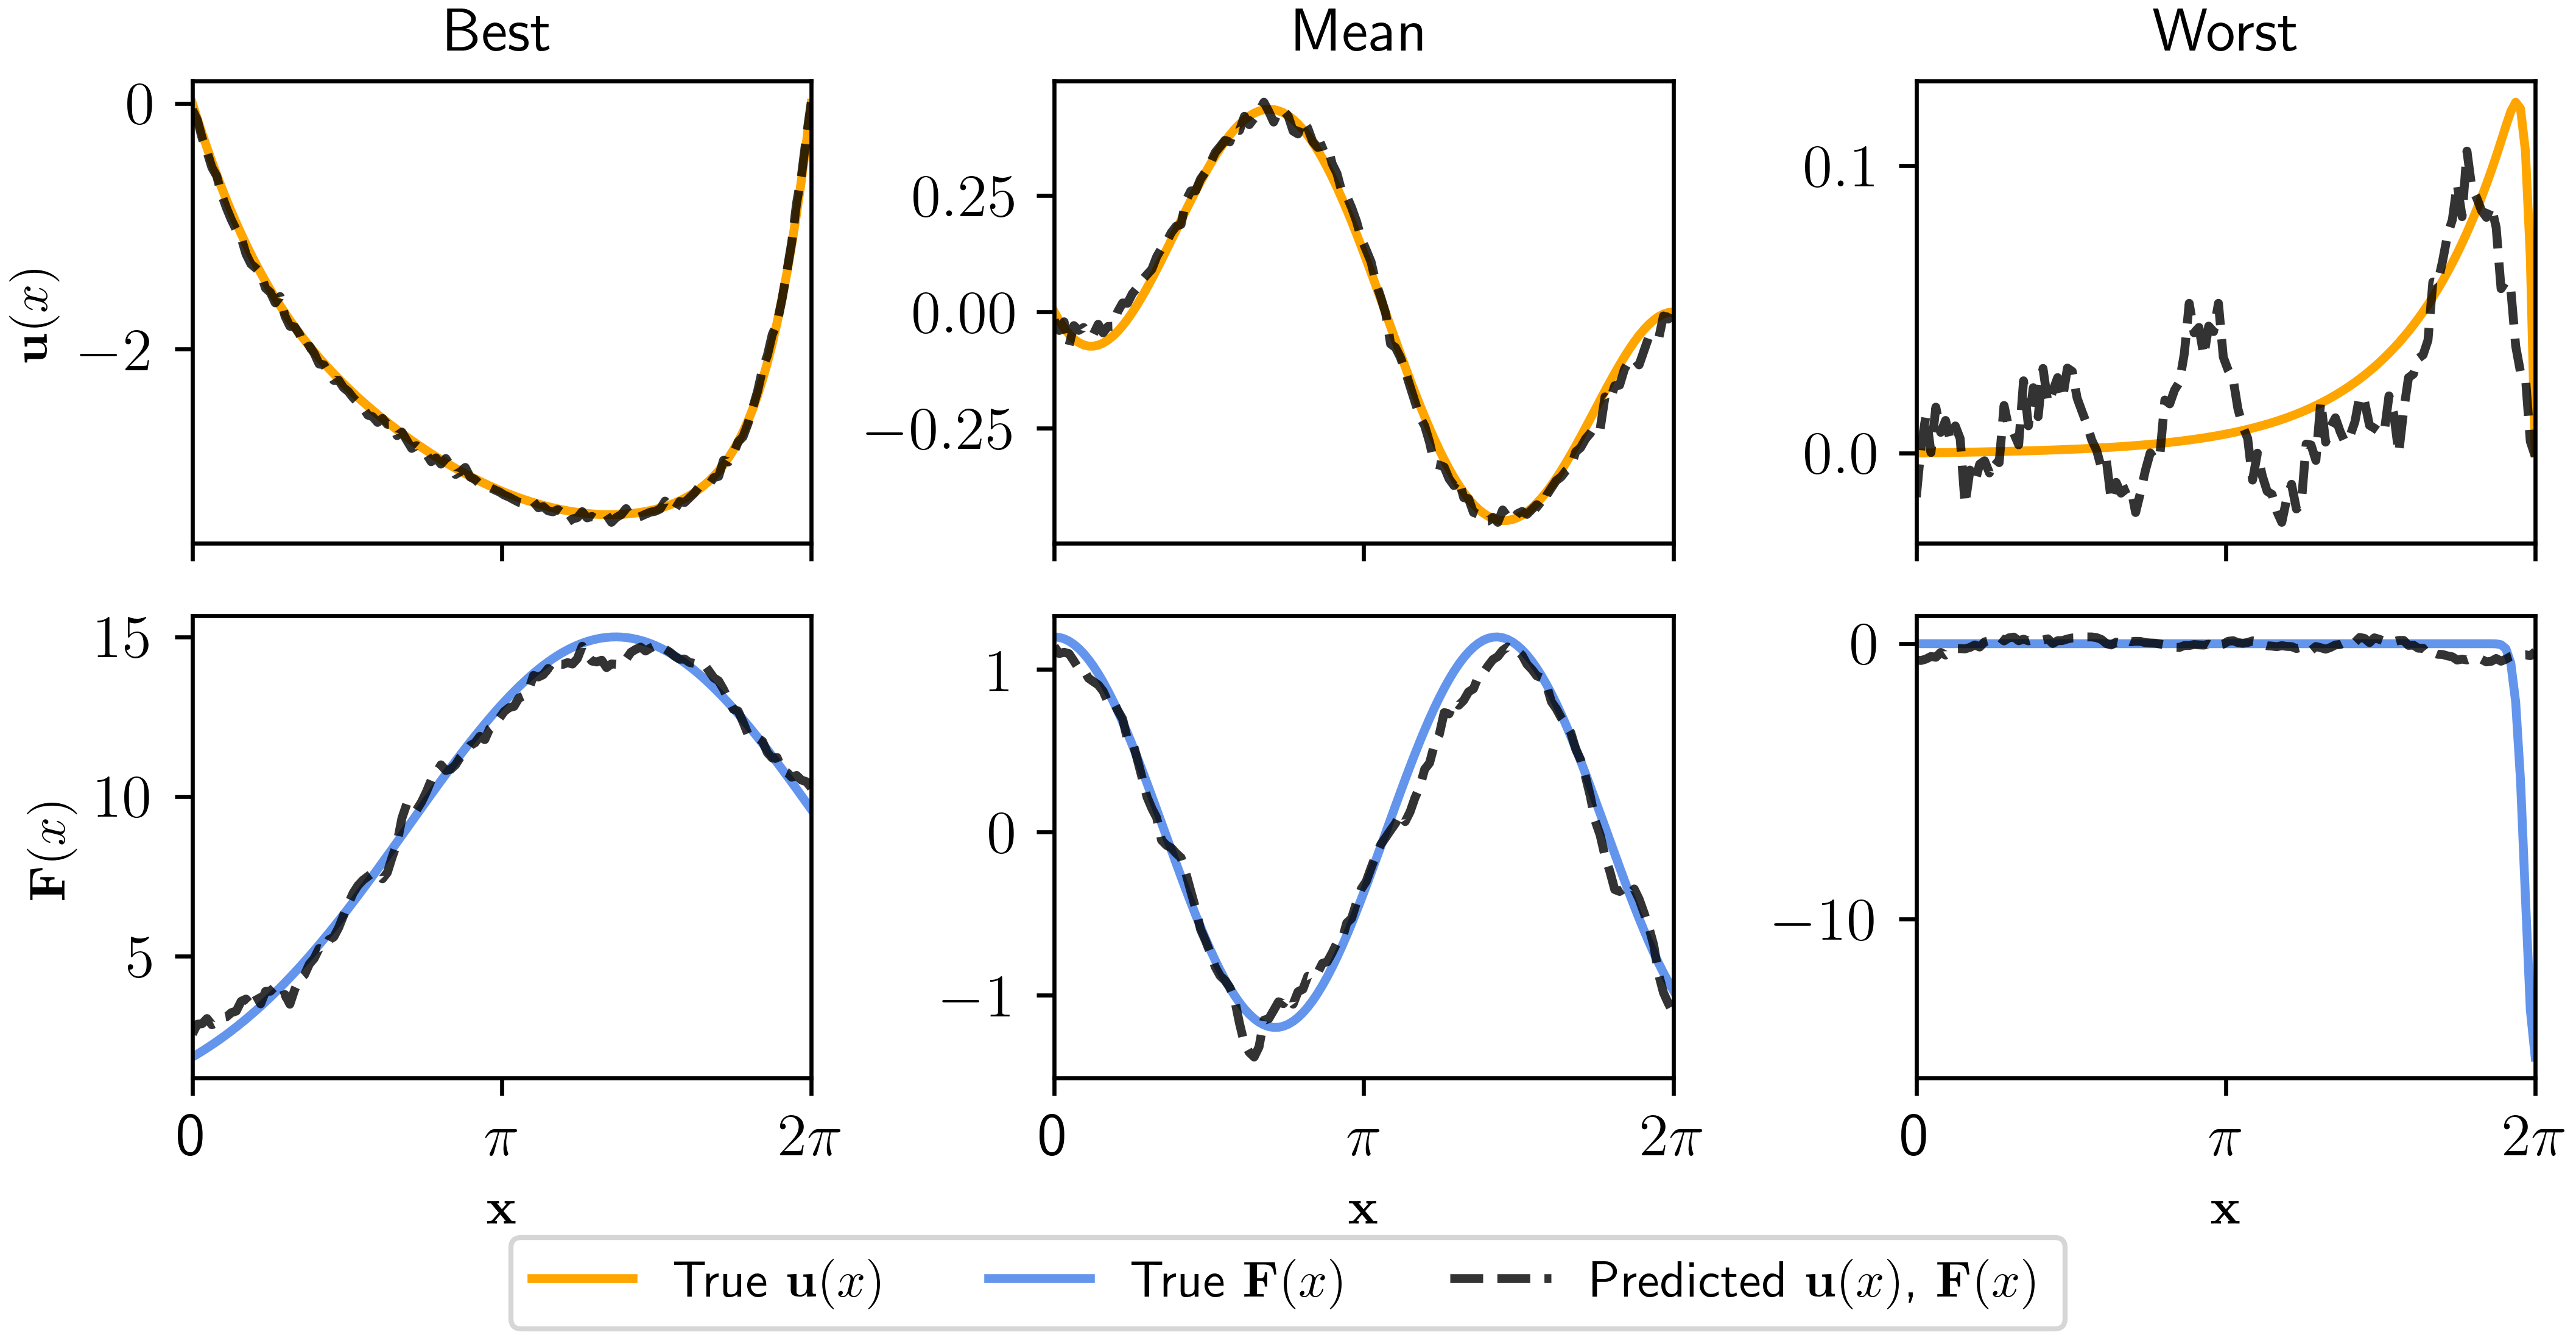

In [15]:
# Set plot options
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['lines.linewidth'] = 1.75
plt.rcParams.update(plot_params)

# Plot and show prediction vs true data for test 1 (similar test data)
prediction_compare_plot(expt, "test1")
plt.show()

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


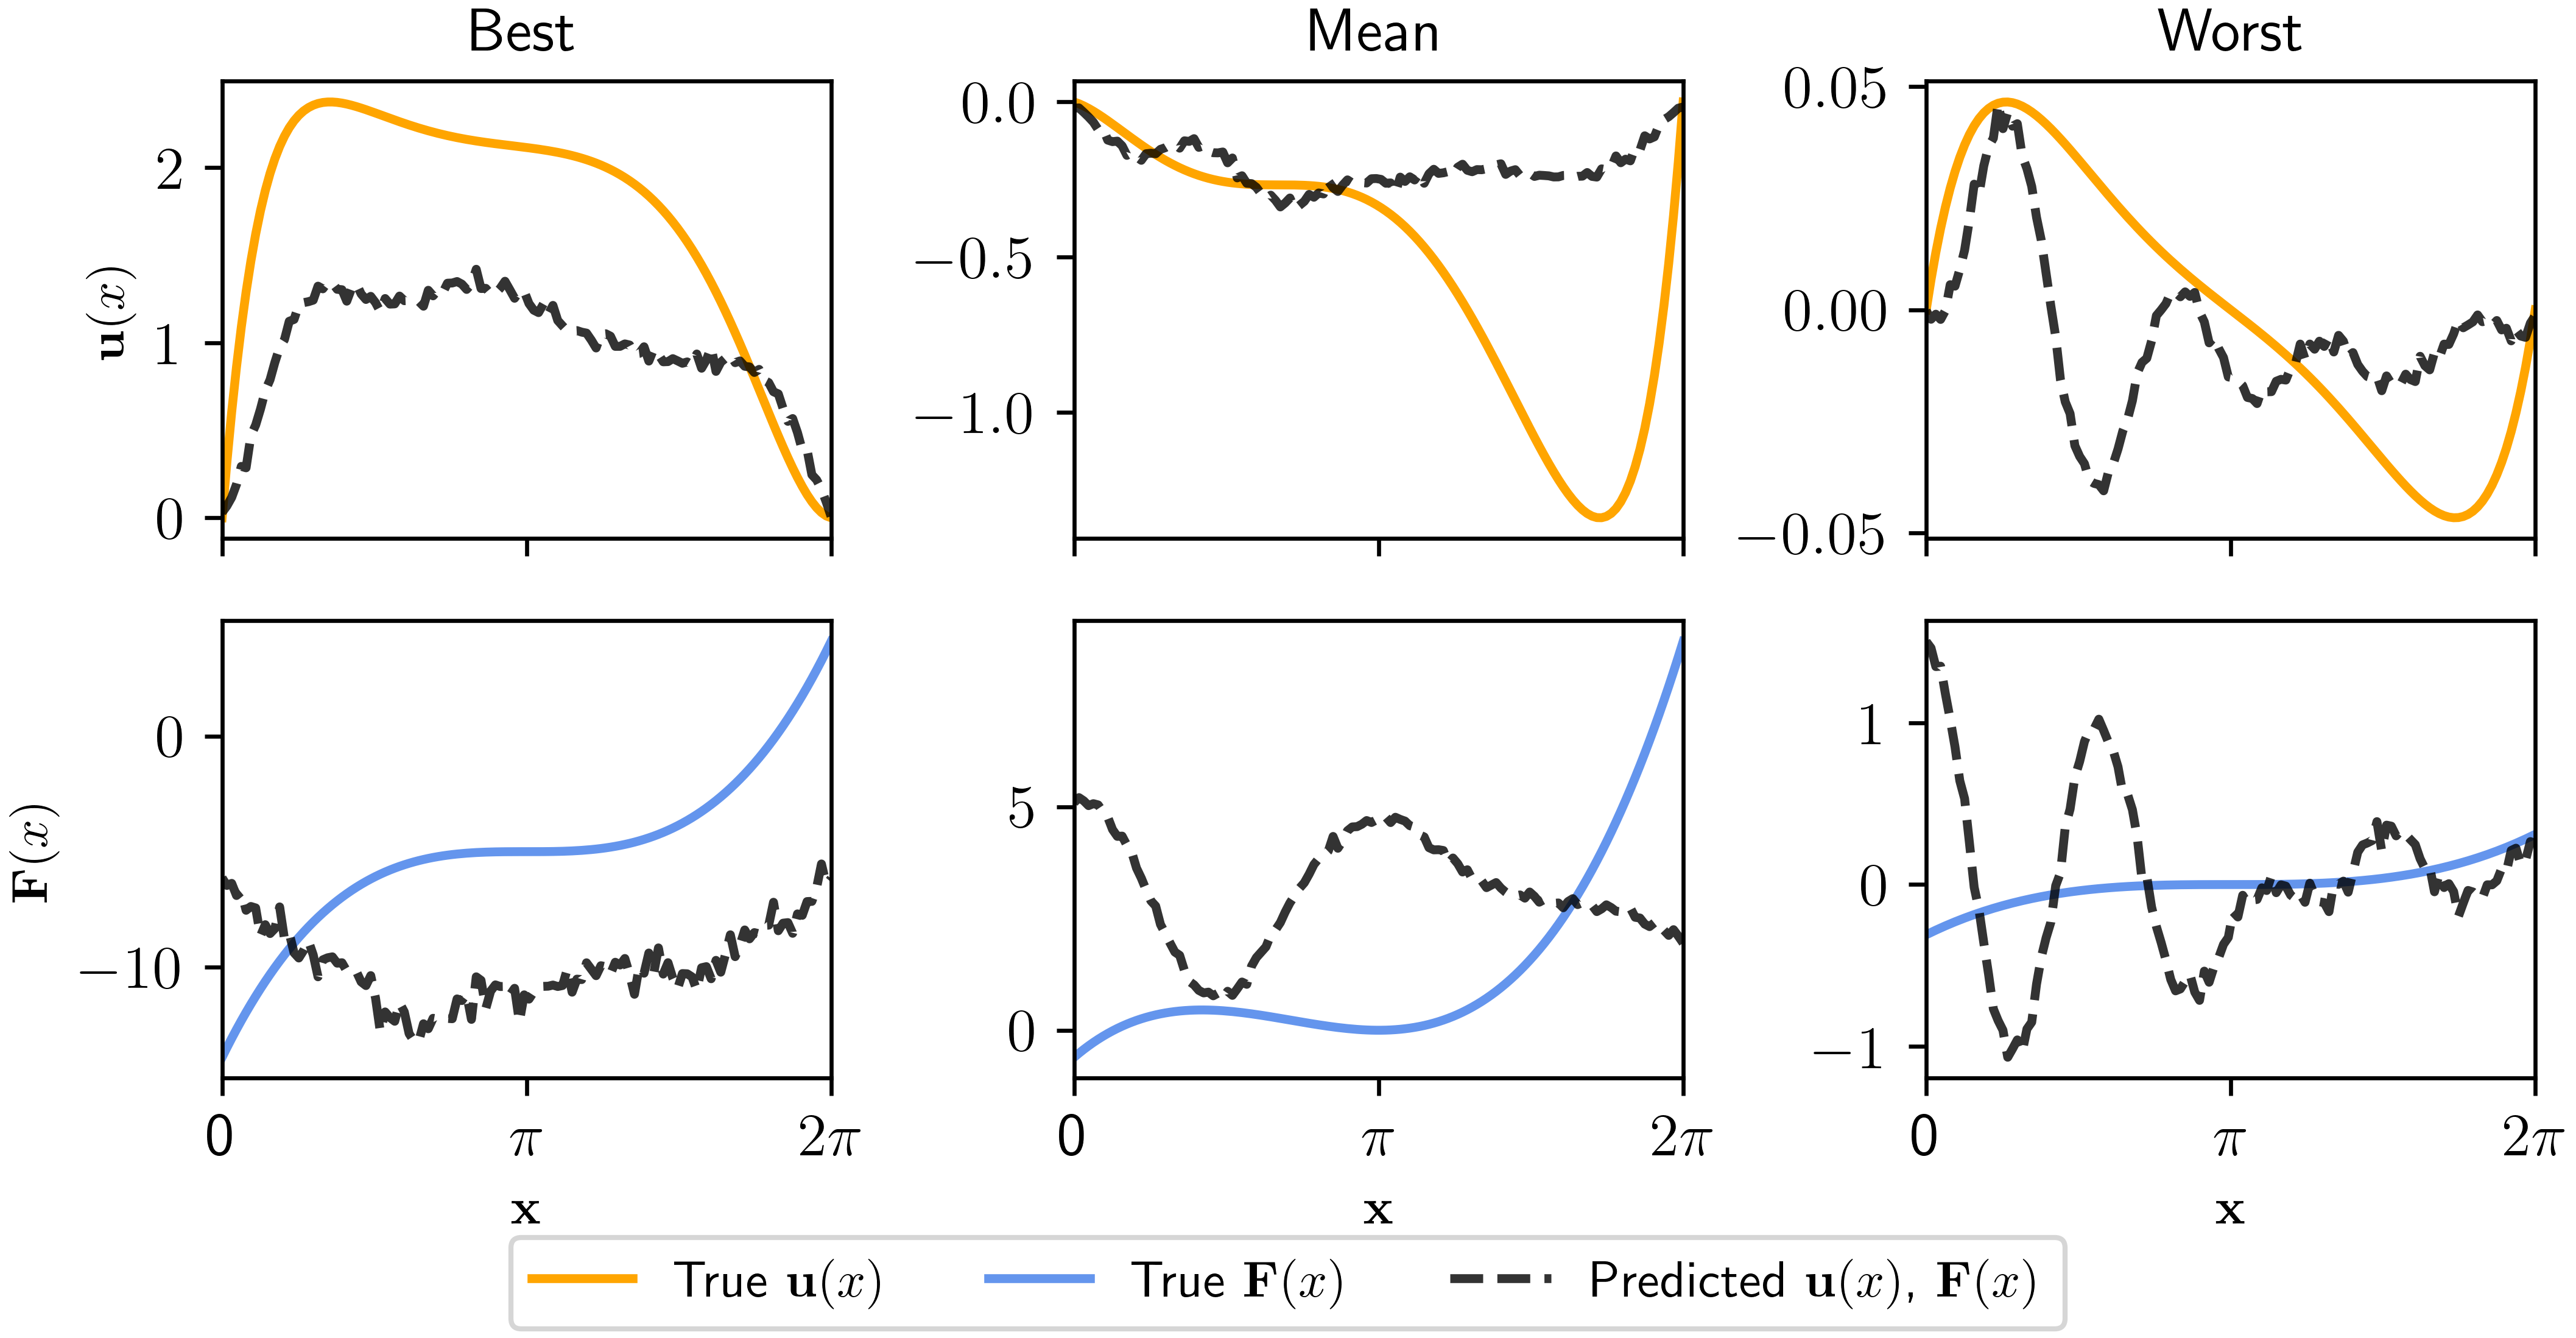

In [4]:
# Set plot options
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['lines.linewidth'] = 1.75
plt.rcParams.update(plot_params)

# Plot and show prediction vs true data for test 2 (dissimilar test data)
prediction_compare_plot(expt, "test2")
plt.show()

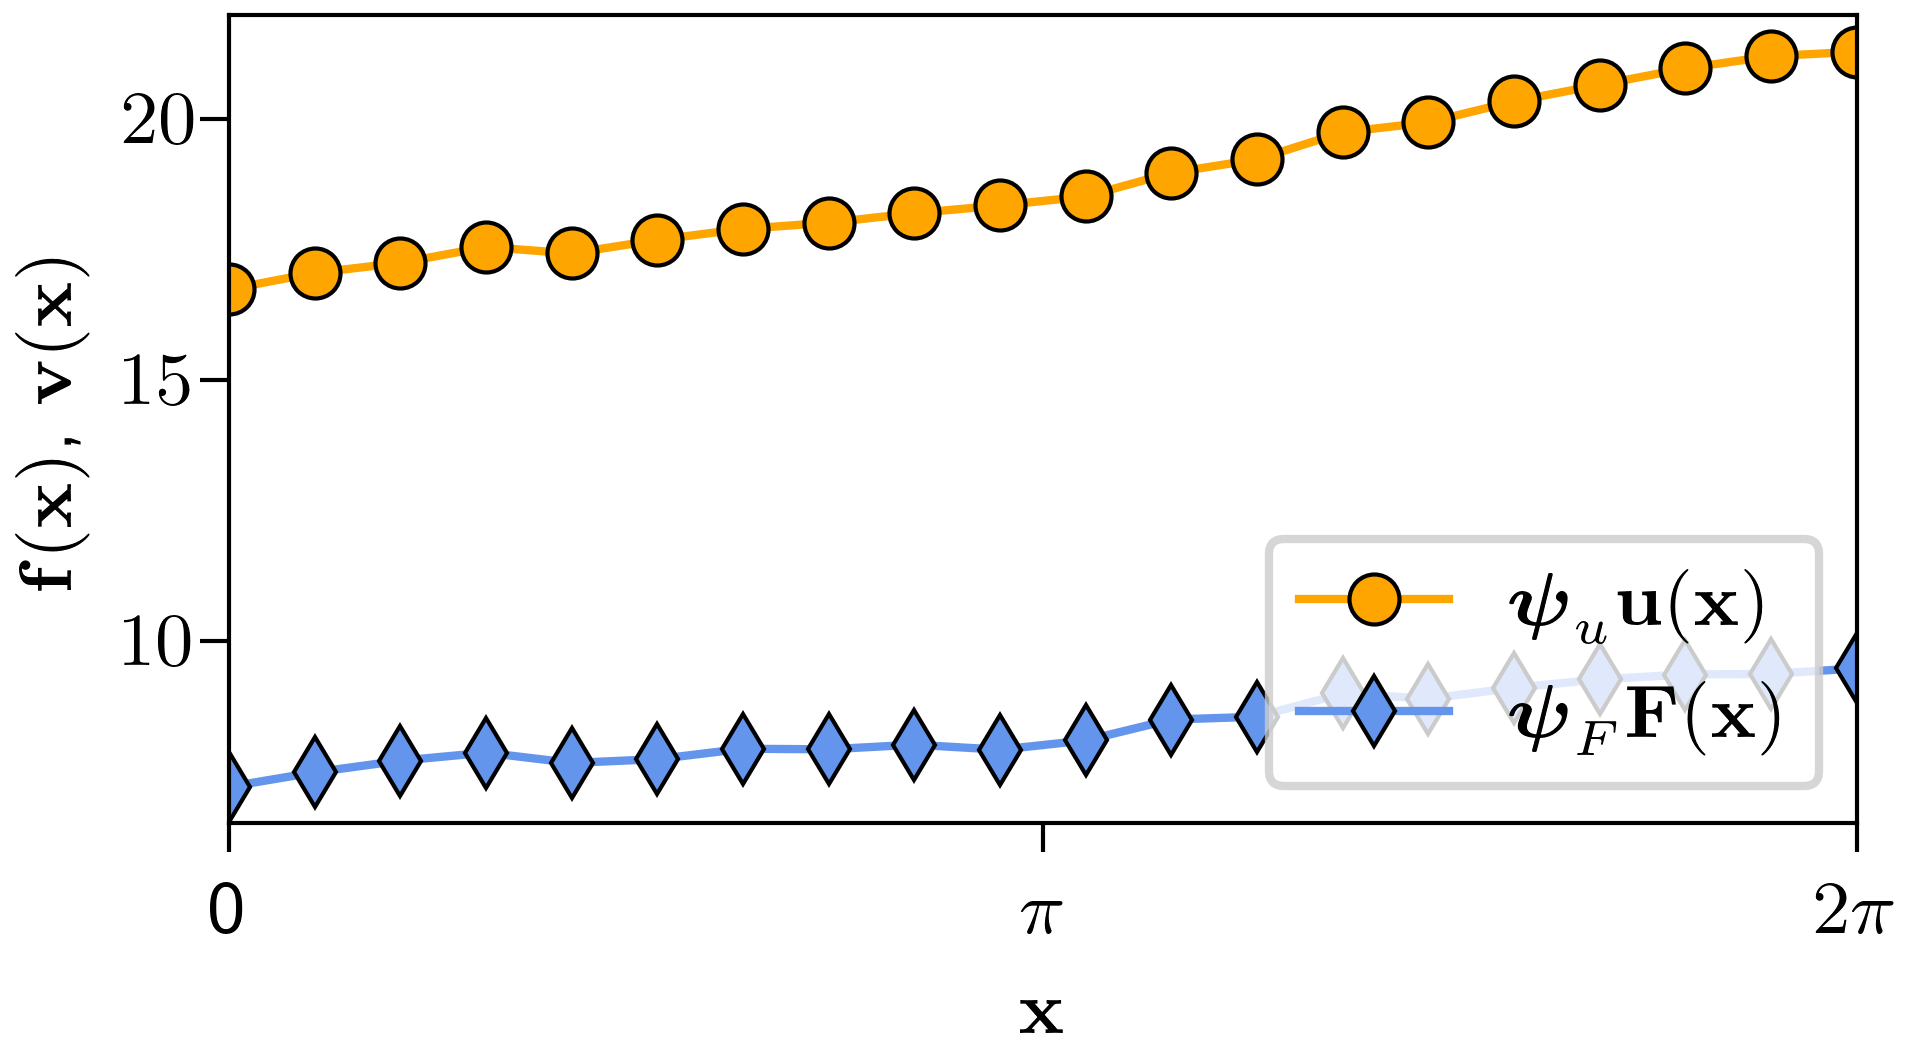

In [5]:
# Set plot options
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (3.5,1.75)
plt.rcParams.update(plot_params)

# Plot and show the latent space vectors
latent_space_plot(expt, index=14, dataset_name='train1')
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step


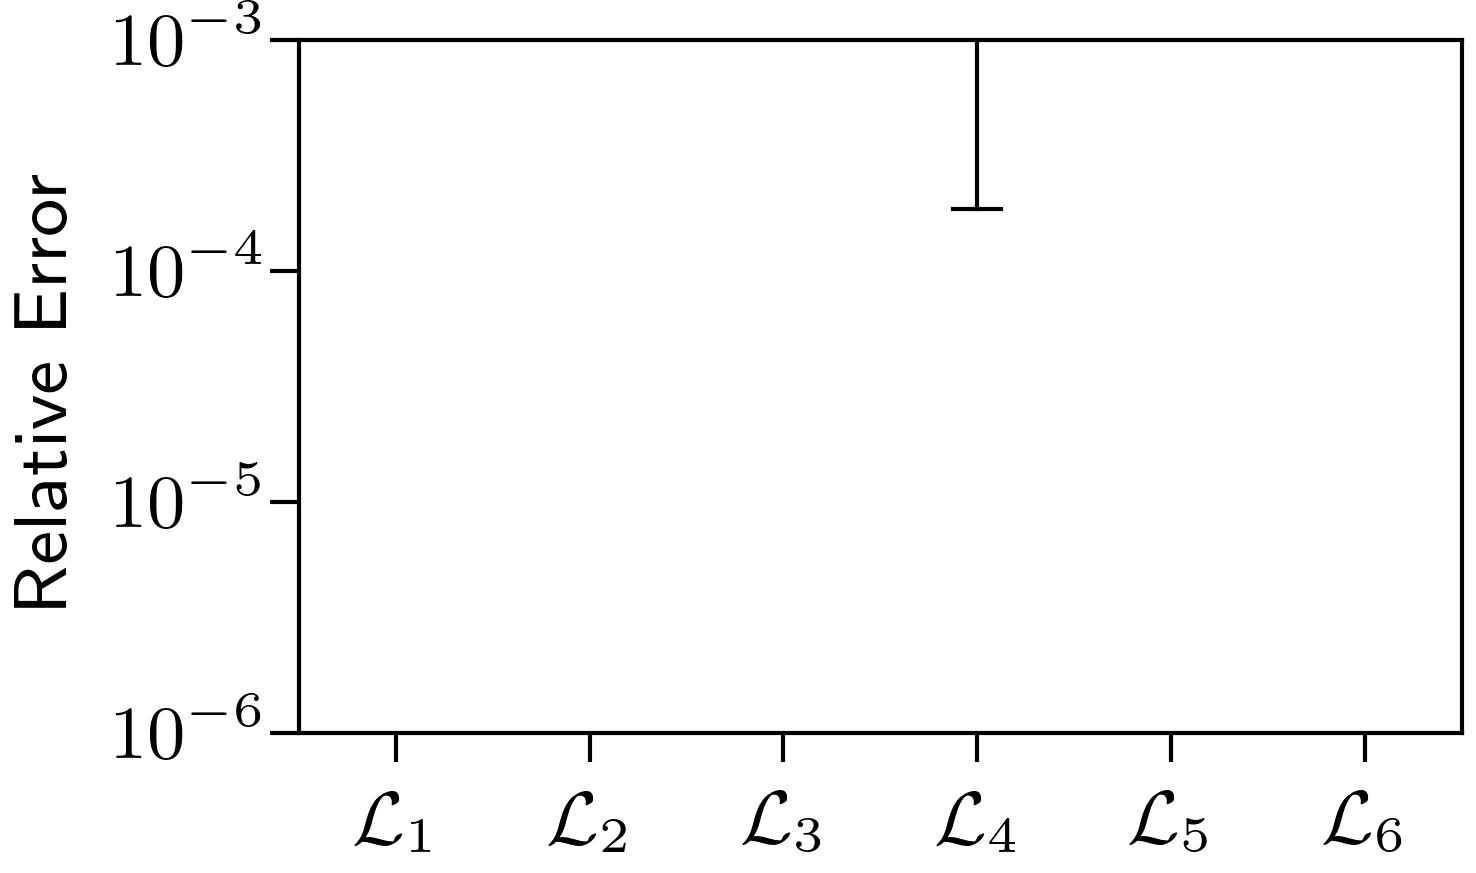

In [6]:
# Set plot options
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (2.5, 1.5)
plt.rcParams.update(plot_params)

# Plot and show the summary boxplot:
loss_boxplot(expt, dataset_name='test1')
plt.show()

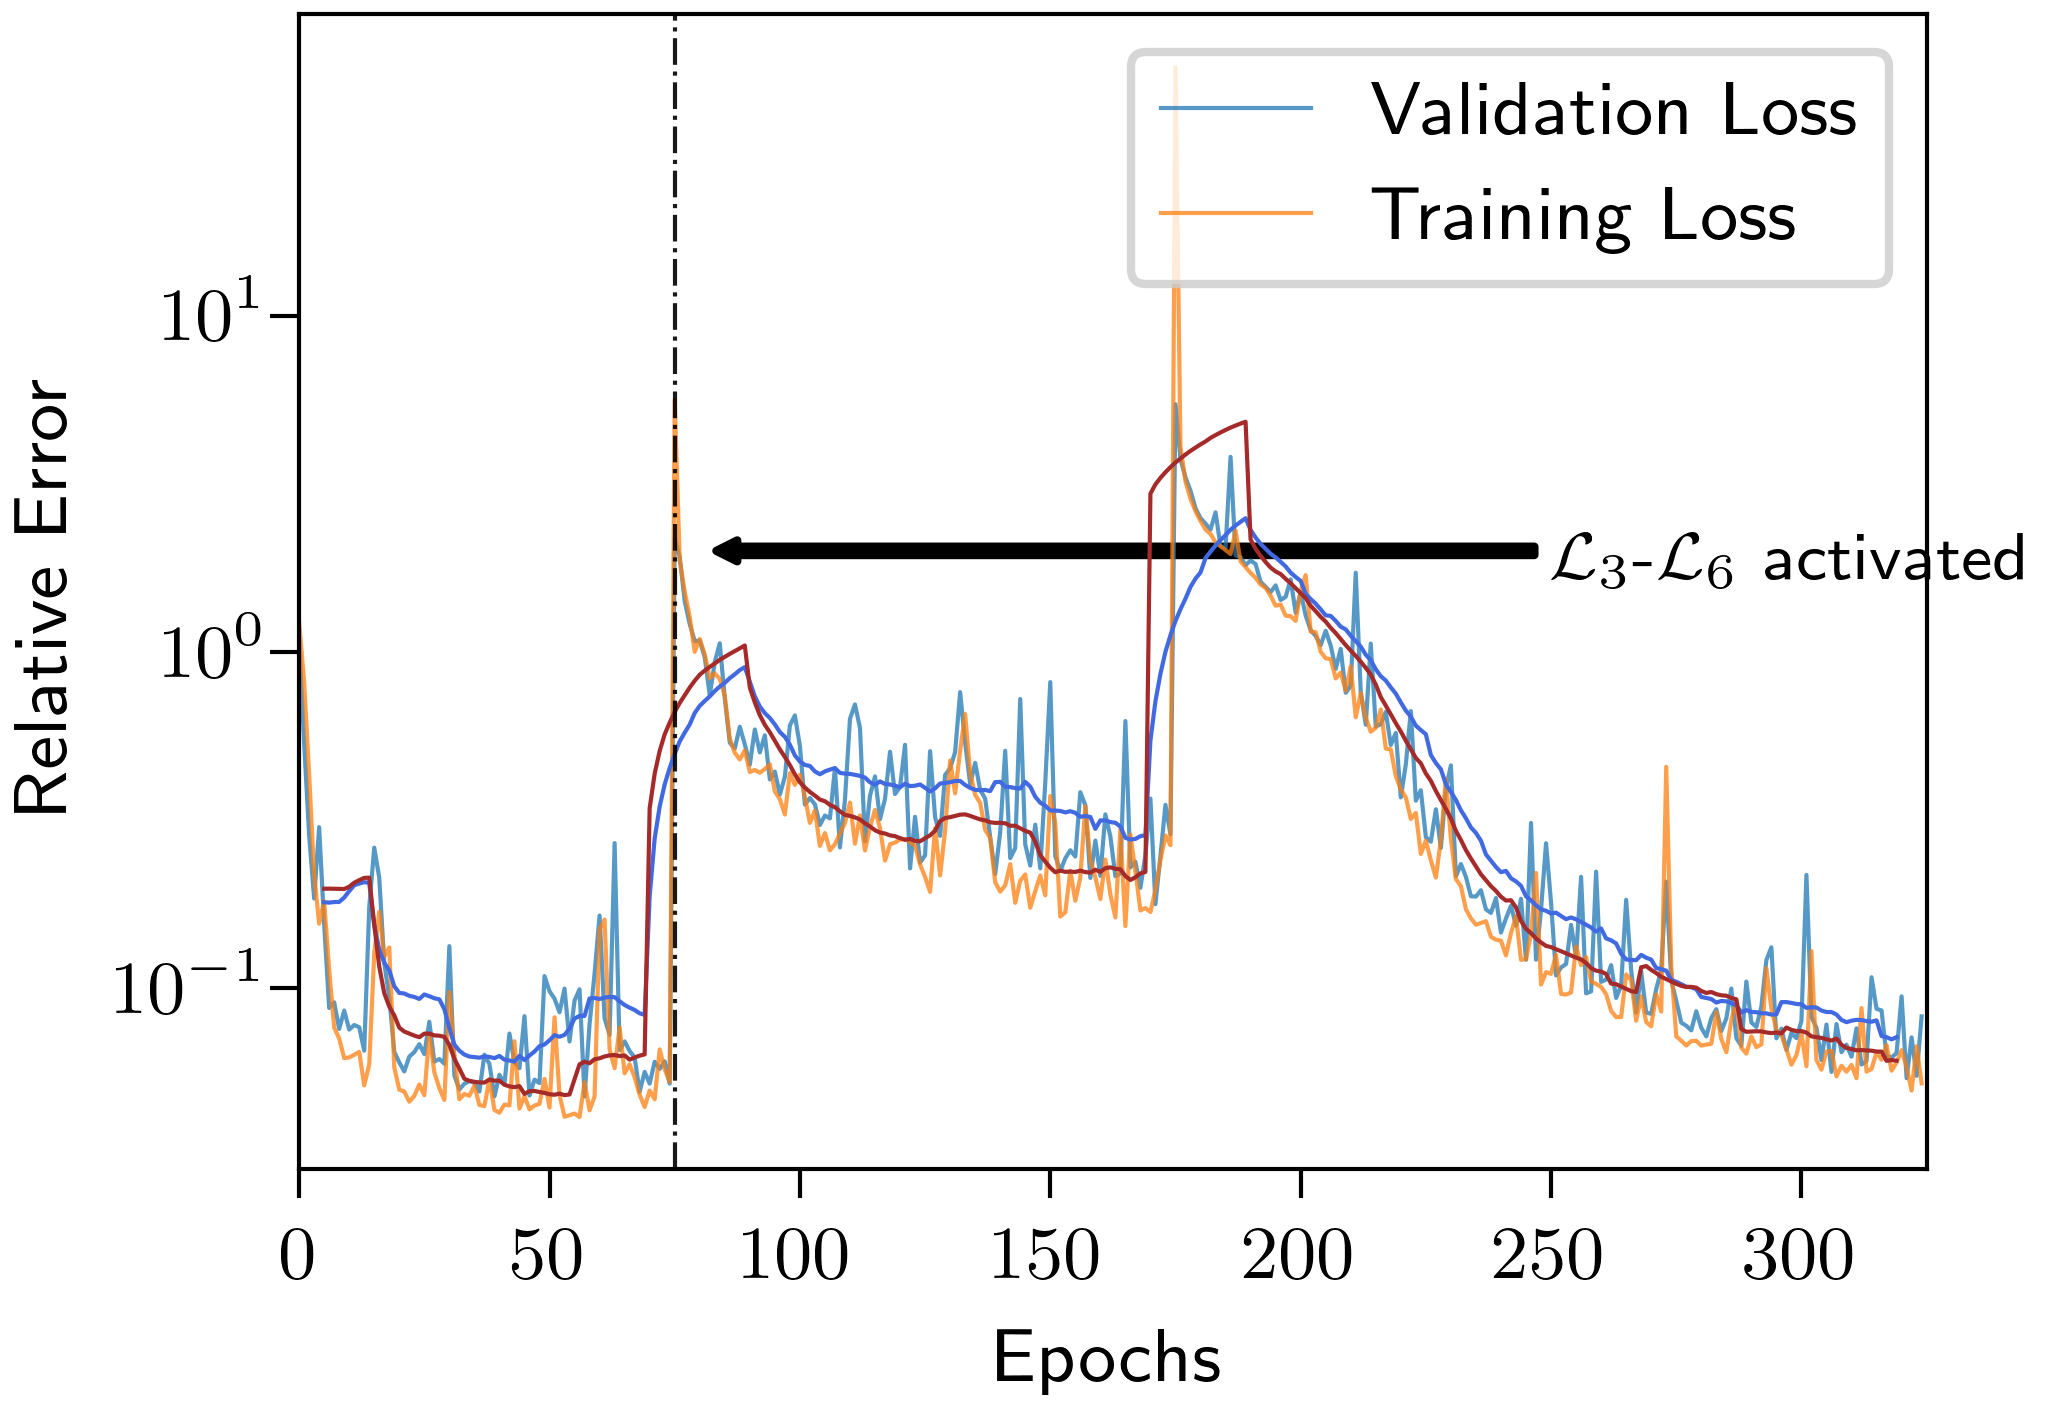

In [7]:
# Set up plotting options
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['lines.linewidth'] = 0.5
plot_params['font.size'] = 8
plt.rcParams.update(plot_params)

# Plot and show the training loss
training_loss_epochs_plot(expt, roll_window=20)
plt.show()

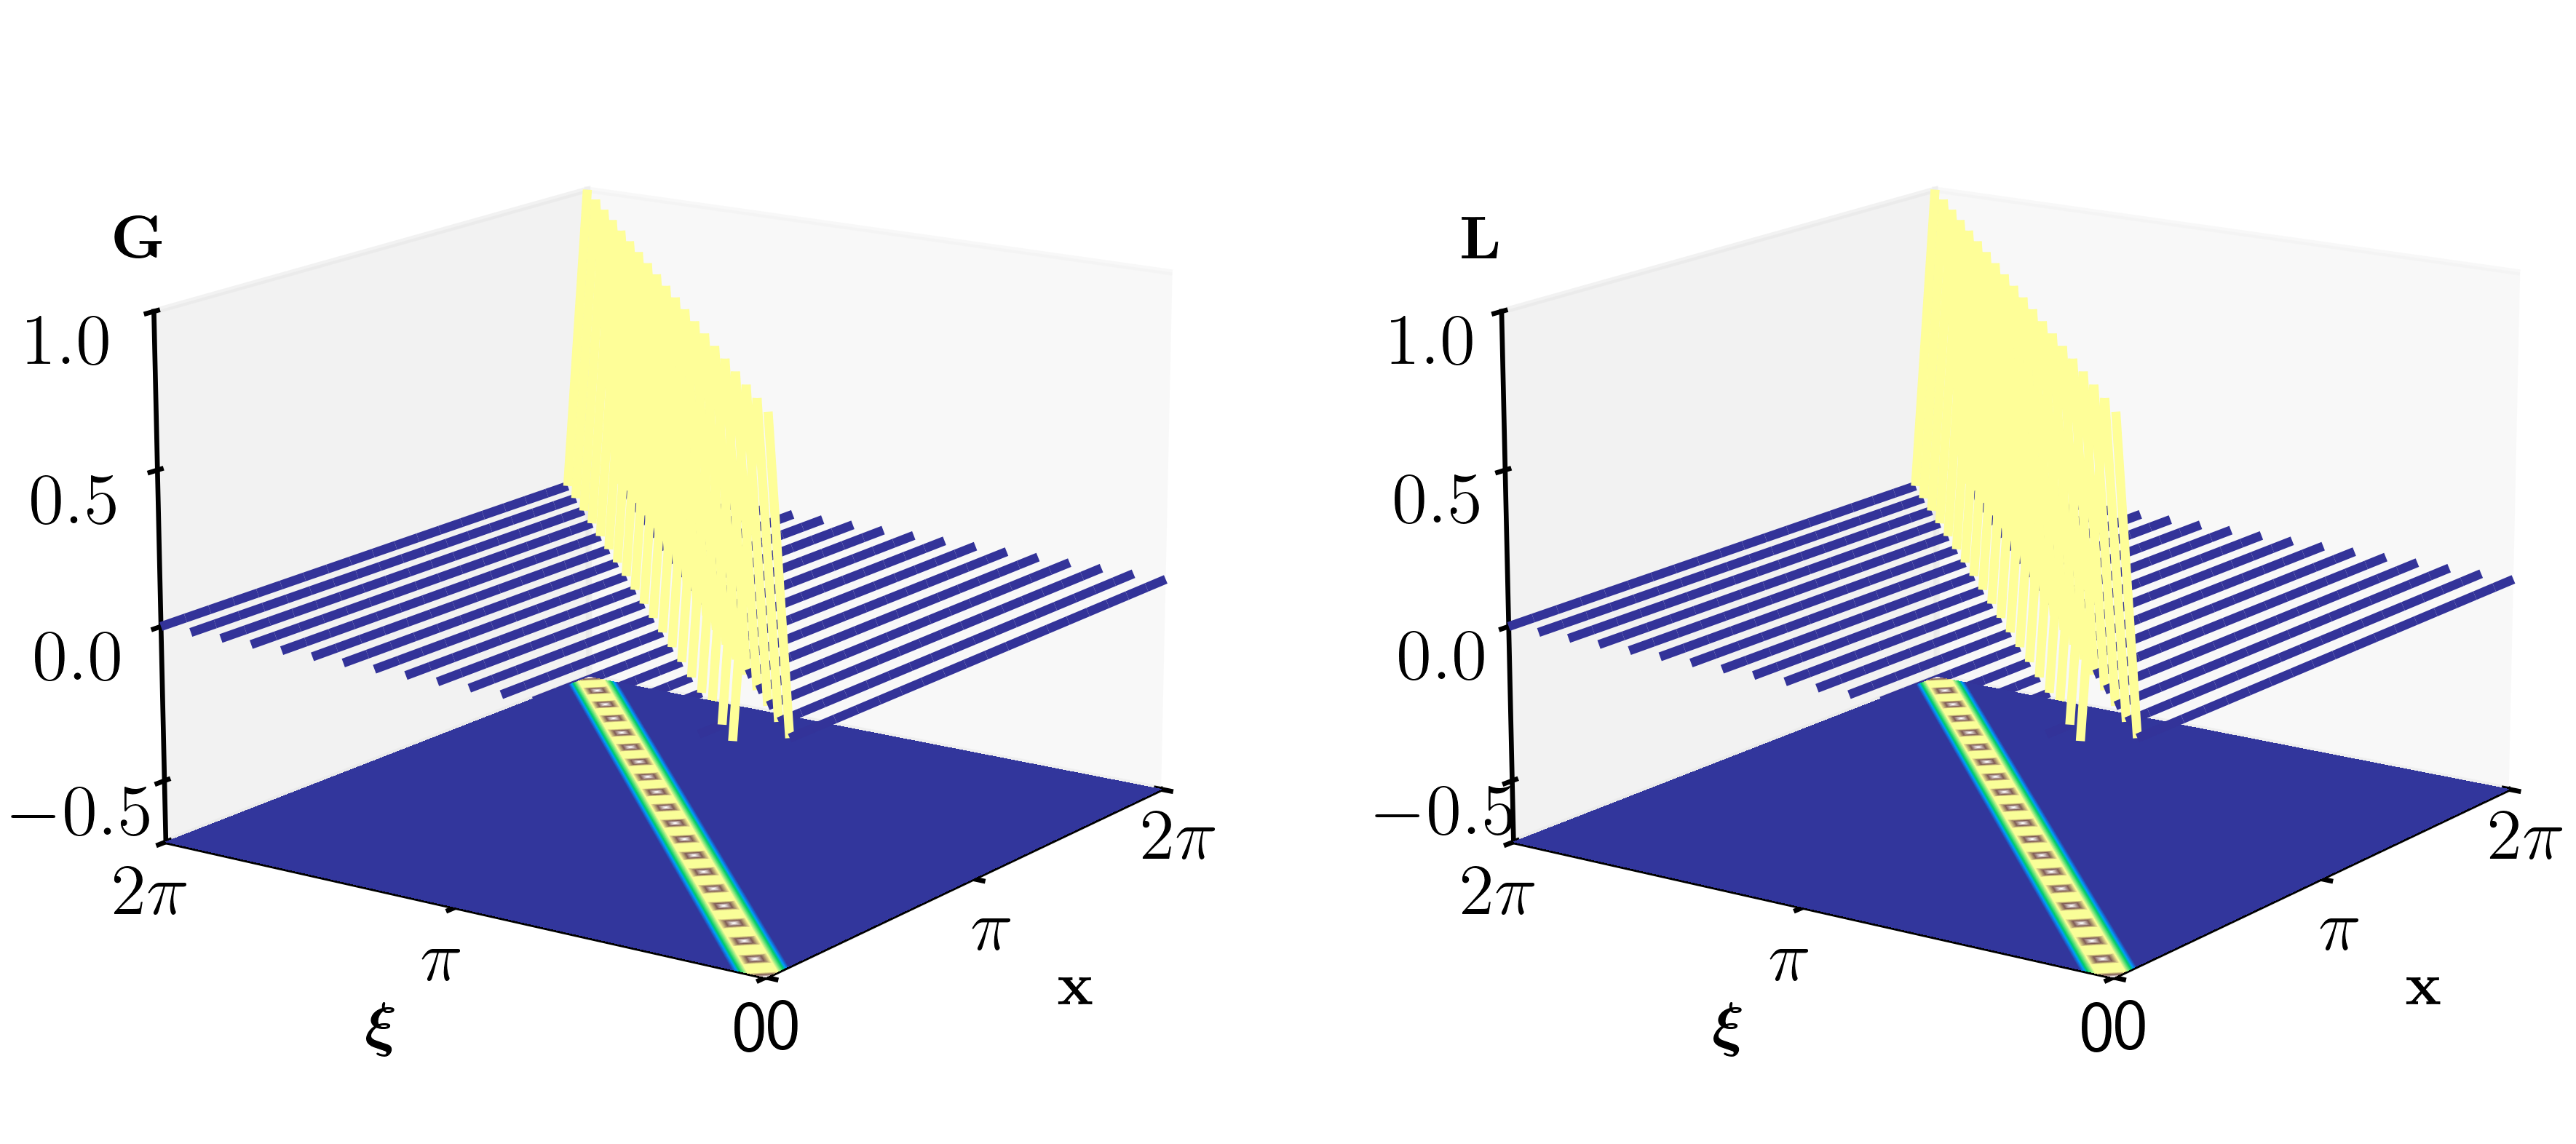

In [8]:
# Set plotting options
plt.rcdefaults()
plt.rcParams.update(full_params)

# Plot and show the Green's function and operator:
generate_GL_plot(expt)
plt.show()

In [10]:
# Set plotting options:
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['axes.linewidth'] = 0.6
plot_params['figure.figsize'] = (5.5,2)
plot_params['legend.fontsize'] = 9
plt.rcParams.update(plot_params)

# Plot and show the 3-experiment summary boxplot:
summary_boxplot(s0, s1, s2)
plt.show()

TypeError: summary_boxplot() missing 1 required positional argument: 's2'

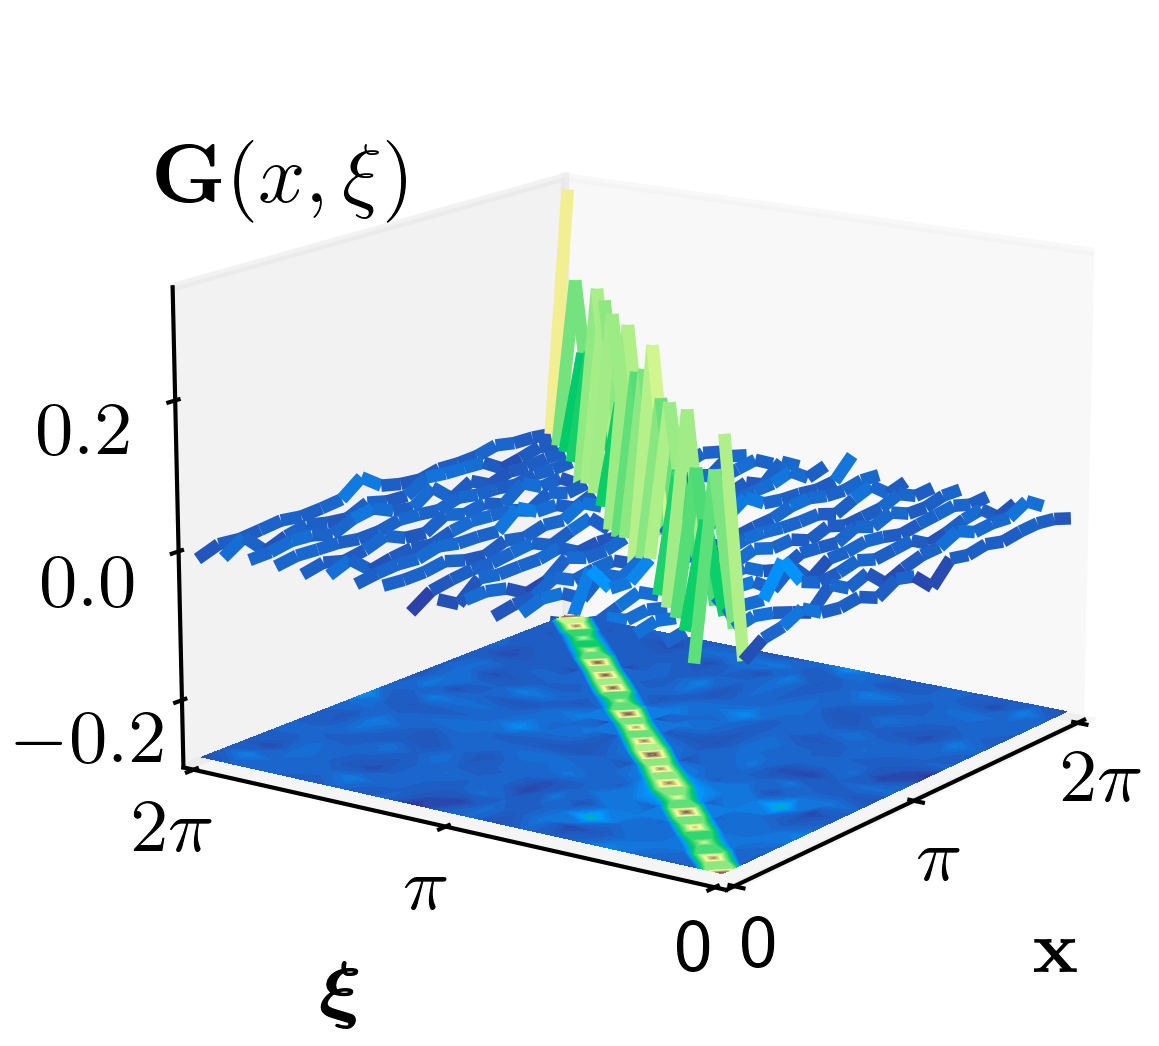

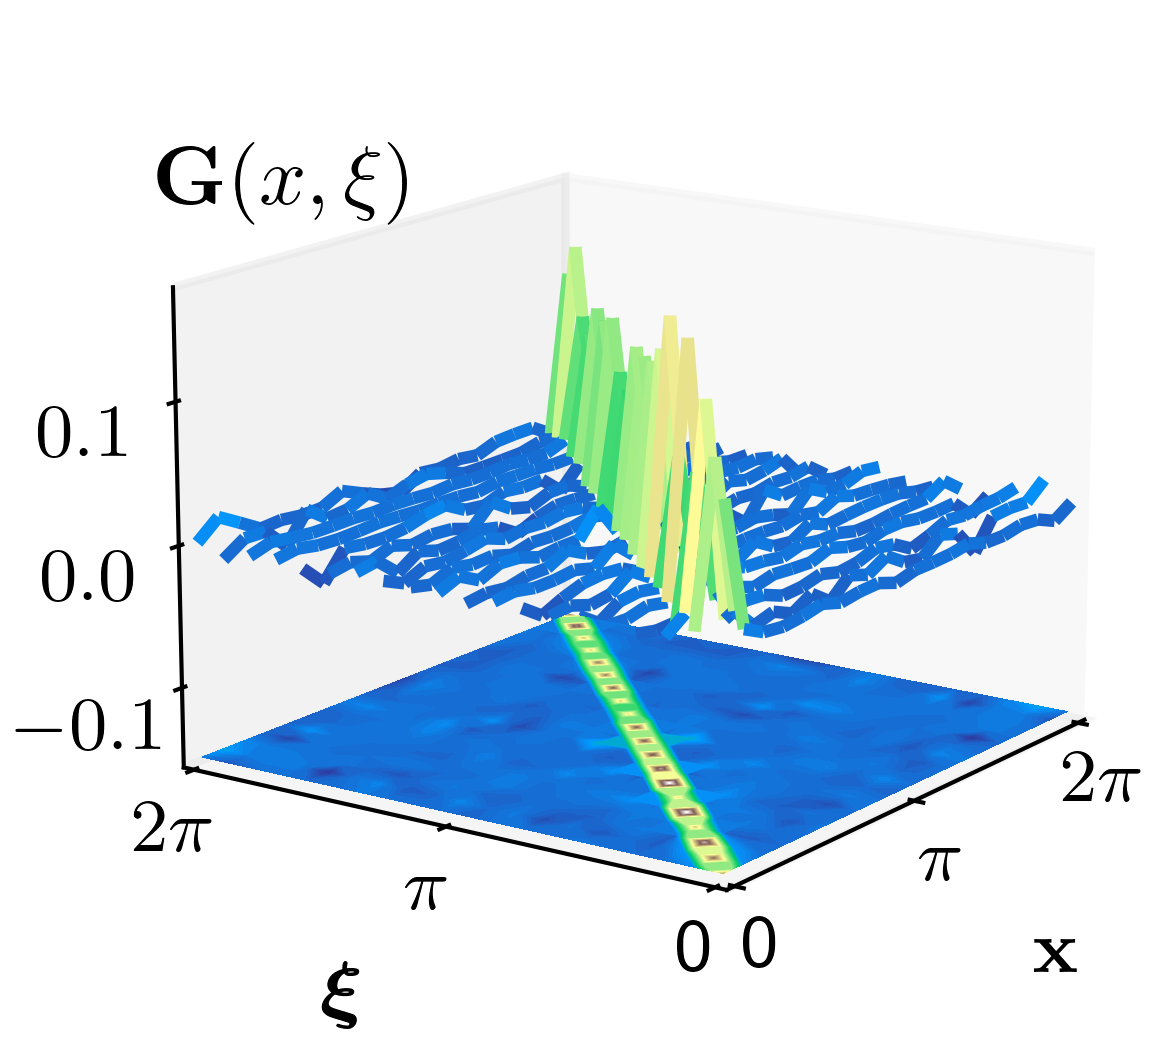

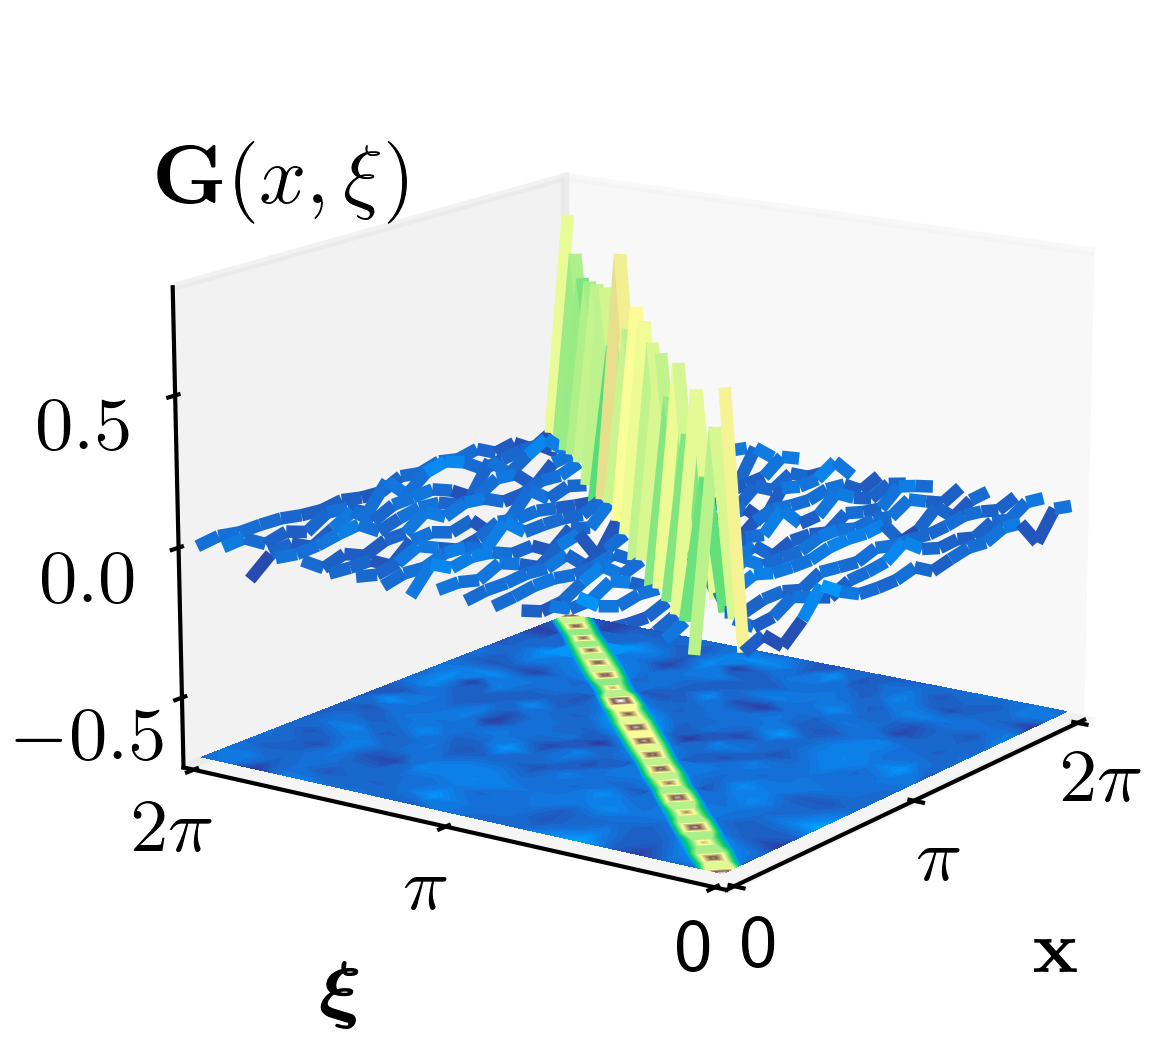

In [ ]:
# Set up plotting options
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (2.2,2.2)
plt.rcParams.update(plot_params)

# Plot and show the Green's function for each of the 3 experiments:
for expt in [s0, s1, s2]:
    generate_G_plot(expt)
    
plt.show()

In [ ]:
# You can score the model against training/test sets like this:
#s0.evaluate_model('train1')
s0.evaluate_model('test1')

39/39 [==============================] - 0s 1ms/step - loss: 8.1880e-04 - output_1_loss: 6.2296e-05 - output_2_loss: 6.2254e-05 - output_3_loss: 1.5258e-04 - output_4_loss: 9.0450e-05


[0.0008188001811504364,
 6.229623249964789e-05,
 6.225447577890009e-05,
 0.00015257651102729142,
 9.044952457770705e-05]

# Two-dimensional results

In [ ]:
# The nonlinear Poisson results use the class Experiment2D
s3 = Experiment2D(experiment_name="Sys3-Paper-Experiment", data_file_prefix='S3-NLP')

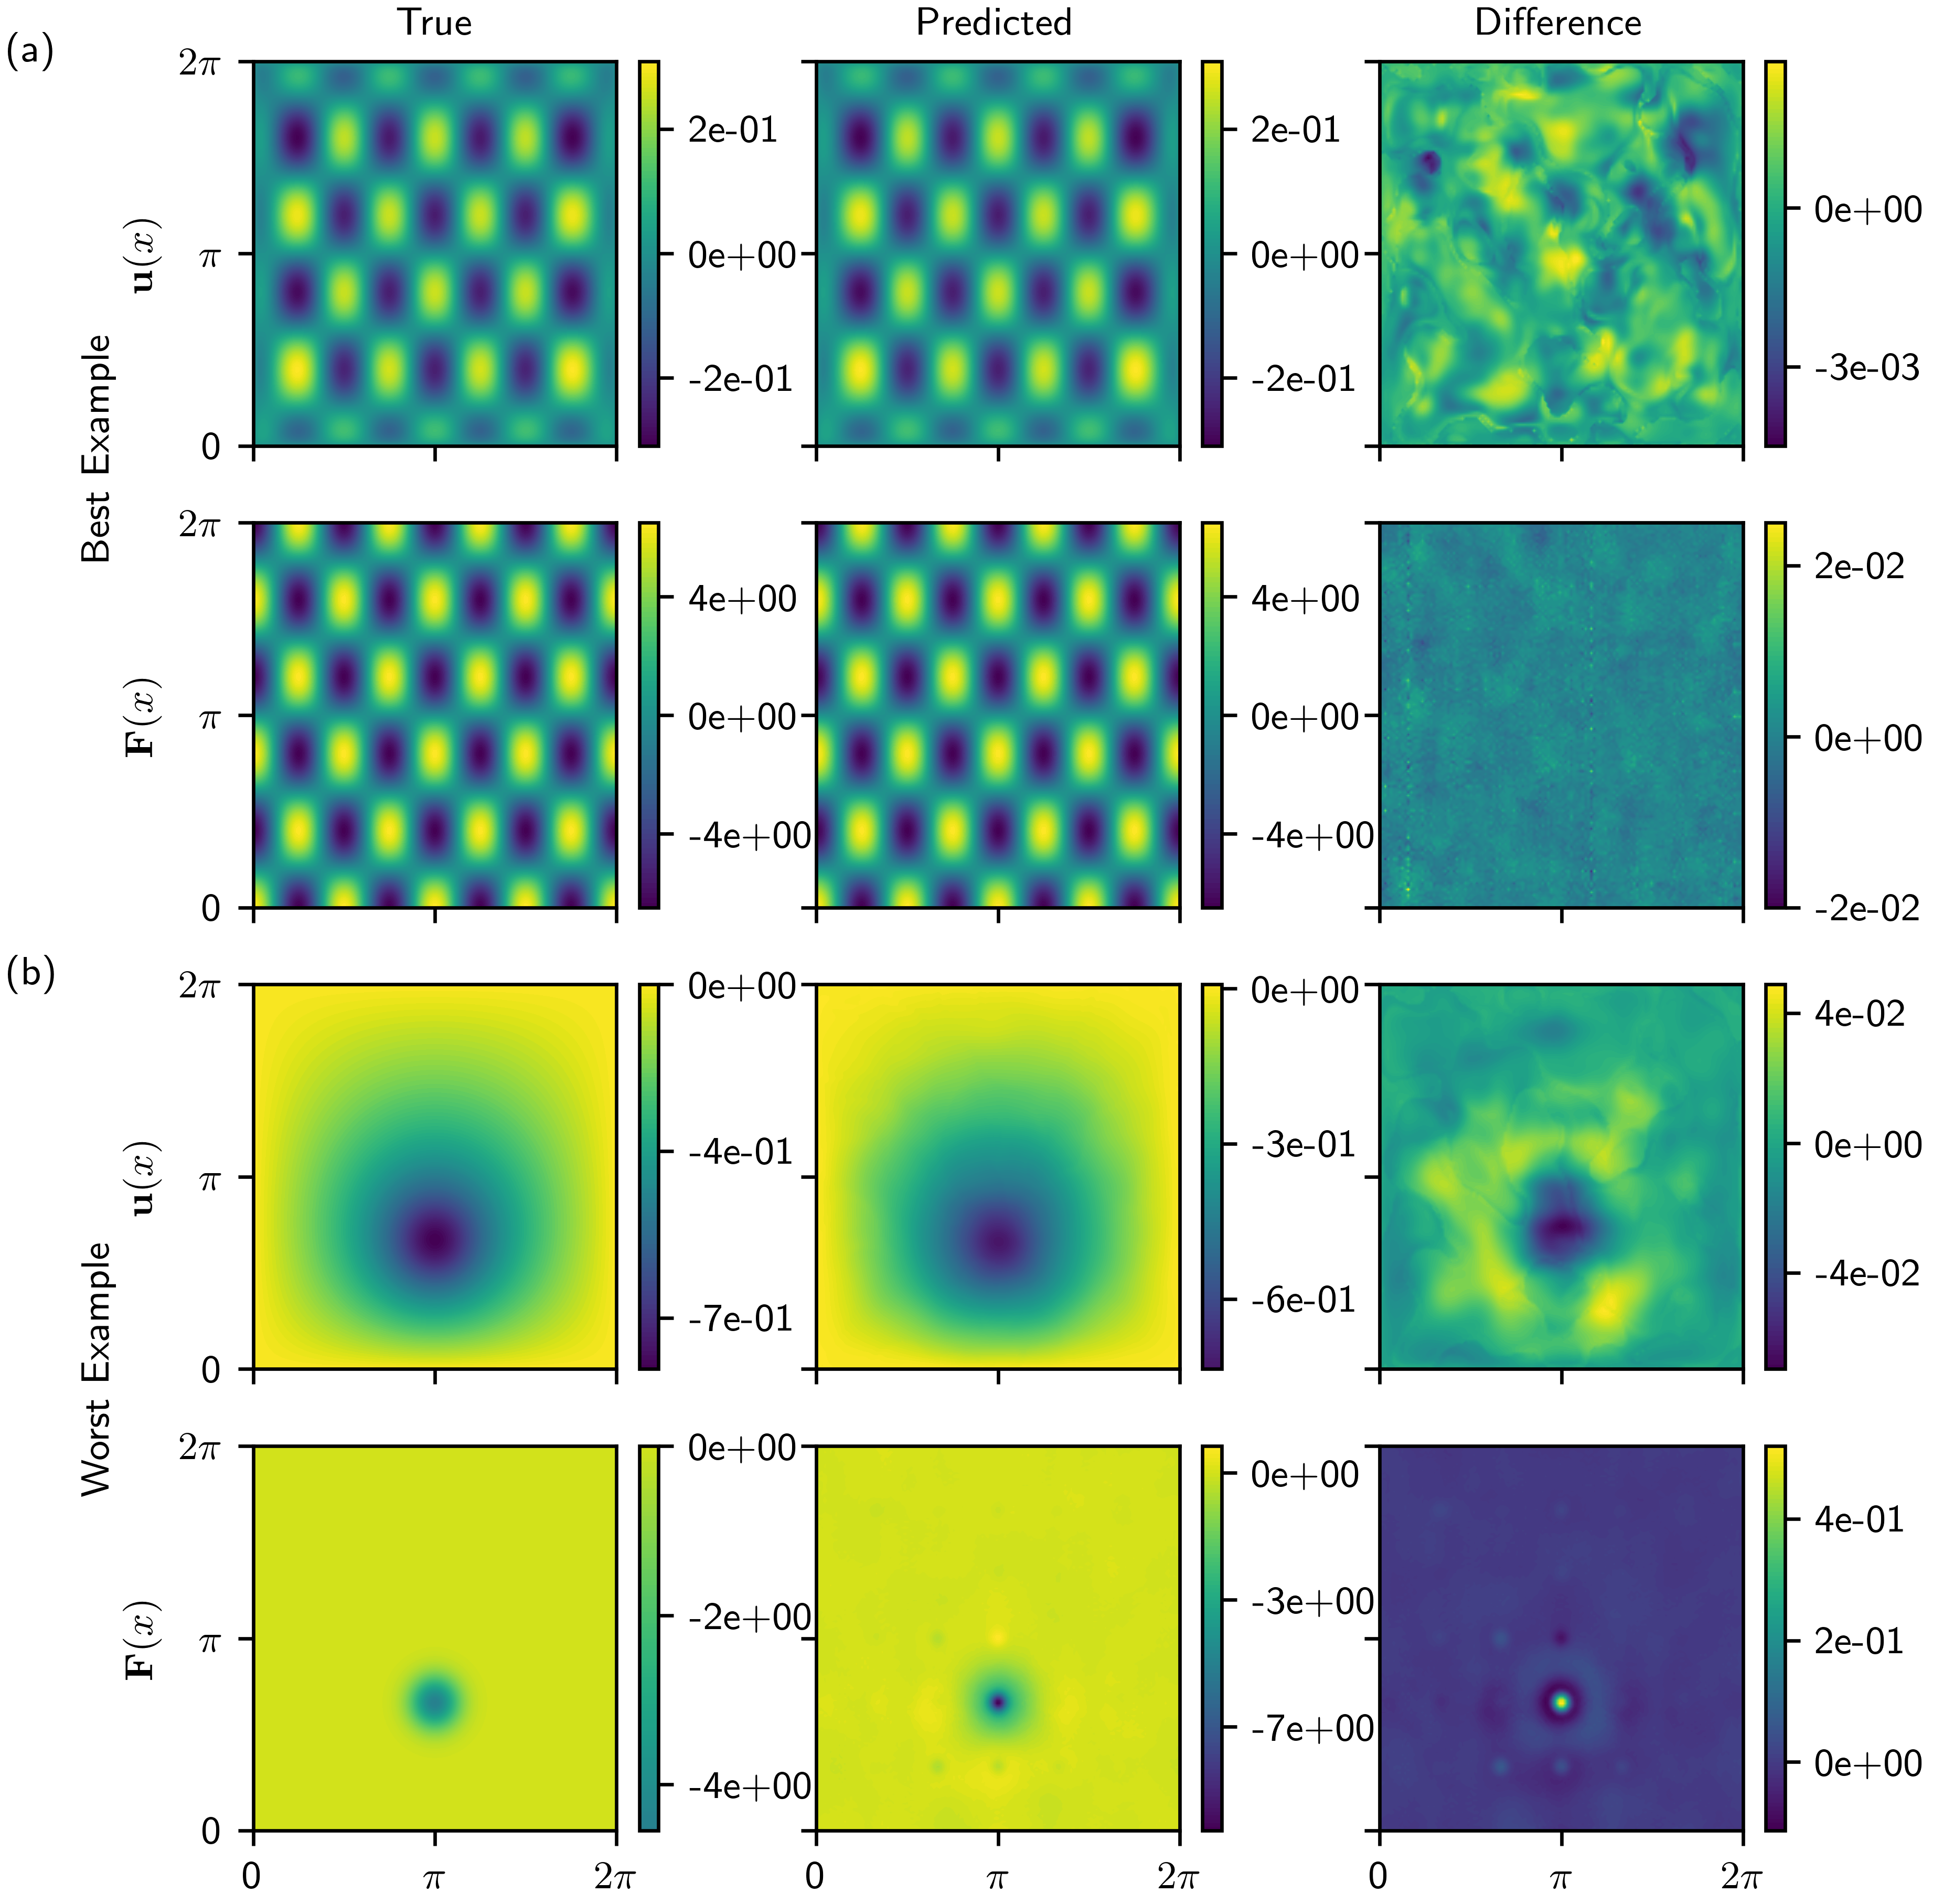

In [ ]:
# Set plot options
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['lines.linewidth'] = 1.75
plot_params['figure.figsize'] = (7.3, 7.3)
plot_params['axes.labelsize'] = 9
plot_params['axes.titlesize'] = 9
plot_params['xtick.labelsize'] = 9
plot_params['ytick.labelsize'] = 9
plt.rcParams.update(plot_params)

# Plot and show prediction vs true data for test 1 (similar test data)
prediction_compare_plot2D(s3, "test1")
plt.show()

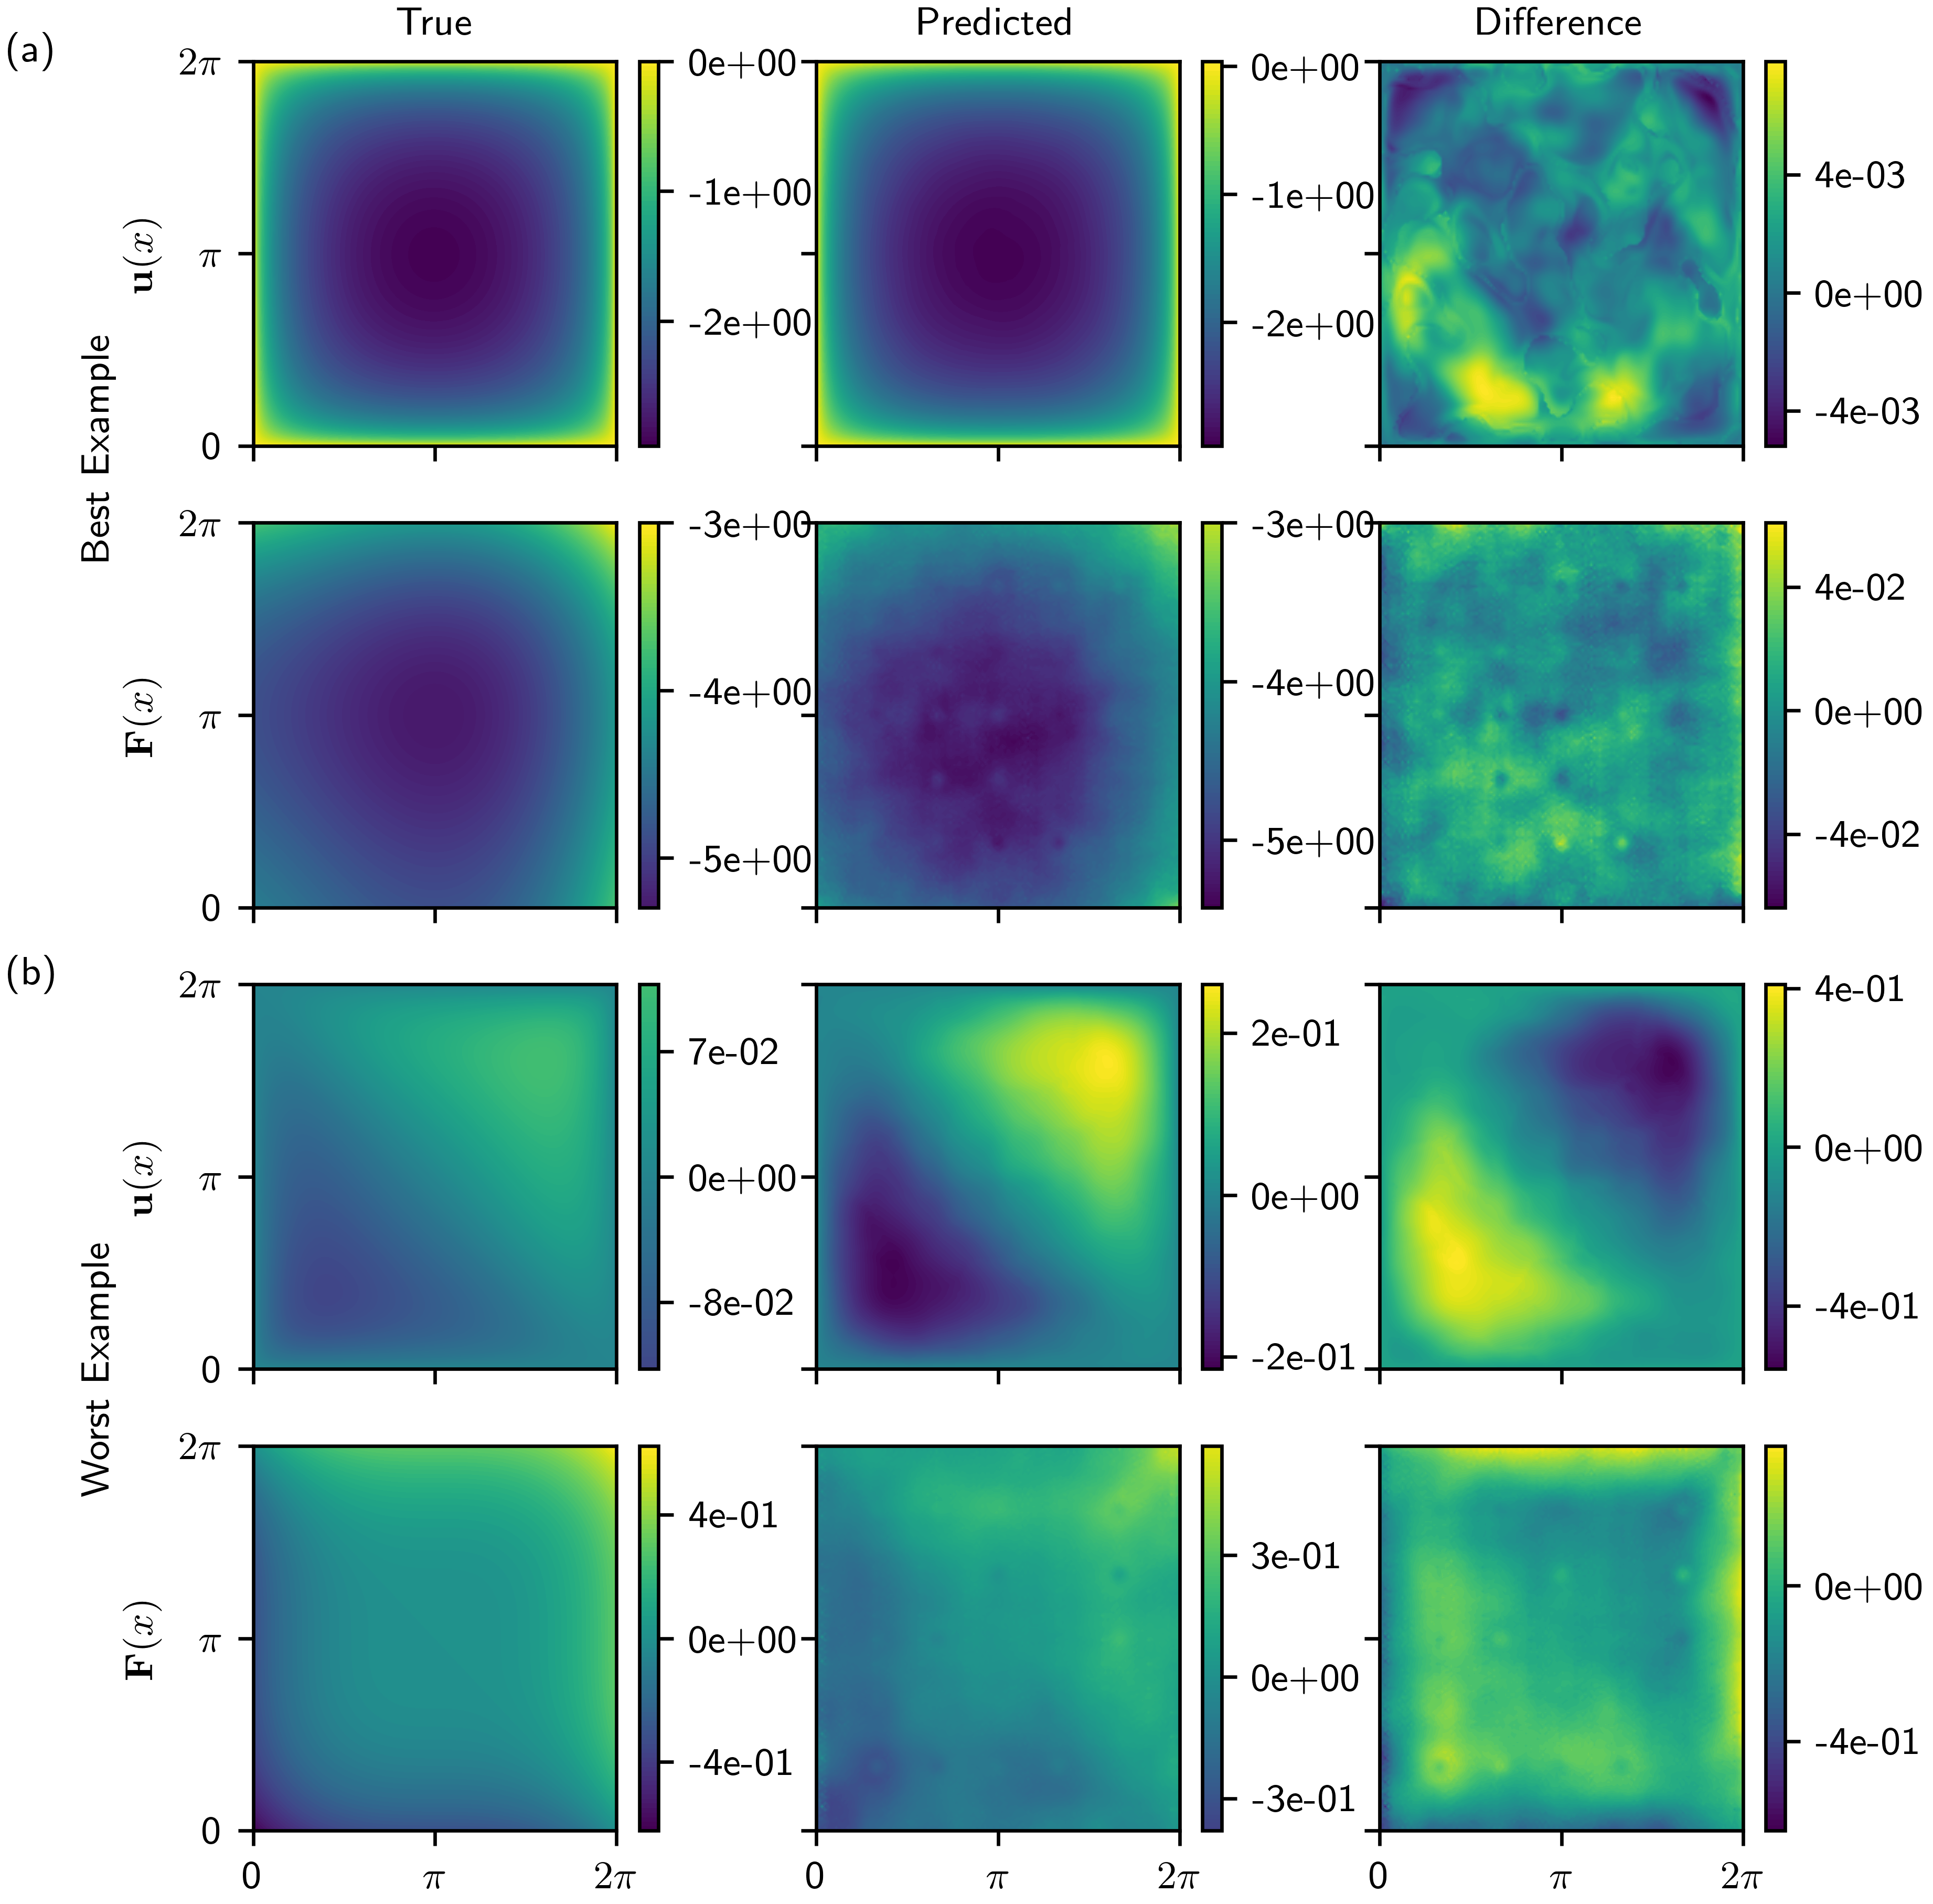

In [ ]:
# Set plot options
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['lines.linewidth'] = 1.75
plot_params['figure.figsize'] = (7.3, 7.3)
plot_params['axes.labelsize'] = 9
plot_params['axes.titlesize'] = 9
plot_params['xtick.labelsize'] = 9
plot_params['ytick.labelsize'] = 9
plt.rcParams.update(plot_params)

# Plot and show prediction vs true data for test 1 (similar test data)
prediction_compare_plot2D(s3, "test2")
plt.show()

In [ ]:
# In order to compare the losses when using the ResNet architecture versus
# not using the ResNet architecture, we need to load six models

s3_NoResNet_a = Experiment2D(experiment_name="S3-NoResNet-a", 
                             data_file_prefix='S3-NLP', 
                             results_folder='results/Appendix-ResNet-vs-NoResNet')
s3_NoResNet_b = Experiment2D(experiment_name="S3-NoResNet-b", 
                             data_file_prefix='S3-NLP', 
                             results_folder='results/Appendix-ResNet-vs-NoResNet')
s3_NoResNet_c = Experiment2D(experiment_name="S3-NoResNet-c", 
                             data_file_prefix='S3-NLP', 
                             results_folder='results/Appendix-ResNet-vs-NoResNet')

s3_ResNet_a = Experiment2D(experiment_name="S3-ResNet-a", 
                           data_file_prefix='S3-NLP',
                           results_folder='results/Appendix-ResNet-vs-NoResNet')
s3_ResNet_b = Experiment2D(experiment_name="S3-ResNet-b", 
                           data_file_prefix='S3-NLP',
                           results_folder='results/Appendix-ResNet-vs-NoResNet')
s3_ResNet_c = Experiment2D(experiment_name="S3-ResNet-c", 
                           data_file_prefix='S3-NLP',
                           results_folder='results/Appendix-ResNet-vs-NoResNet')

In [ ]:
# Calculate validation losses when network does not have ResNet architecture
NoResNet_a_loss = s3_NoResNet_a.evaluate_model('val')
NoResNet_b_loss = s3_NoResNet_b.evaluate_model('val')
NoResNet_c_loss = s3_NoResNet_c.evaluate_model('val')

NoResNet_losses = [NoResNet_a_loss[0], NoResNet_b_loss[0], NoResNet_c_loss[0]]

print("\nNo ResNet Architecture")
print("Validation Losses: ", NoResNet_losses)
print("Mean: ", np.mean(NoResNet_losses))
print("Median: ", np.median(NoResNet_losses))

77/77 [==============================] - 11s 146ms/step - loss: 1.9316 - output_1_loss: 0.4705 - output_2_loss: 0.4951 - output_3_loss: 0.4954 - output_4_loss: 0.4705

No ResNet Architecture
Validation Losses:  [1.9333131313323975, 1.9313815832138062, 1.9316091537475586]
Mean:  1.9321012894312541
Median:  1.9316091537475586


In [ ]:
# Calculate validation losses when network has ResNet architecture
ResNet_a_loss = s3_ResNet_a.evaluate_model('val')
ResNet_b_loss = s3_ResNet_b.evaluate_model('val')
ResNet_c_loss = s3_ResNet_c.evaluate_model('val')

ResNet_losses = [ResNet_a_loss[0], ResNet_b_loss[0], ResNet_c_loss[0]]

print("\nResNet Architecture")
print("Validation Losses: ", ResNet_losses)
print("Mean: ", np.mean(ResNet_losses))
print("Median: ", np.median(ResNet_losses))

77/77 [==============================] - 13s 163ms/step - loss: 0.0011 - output_1_loss: 5.0521e-05 - output_2_loss: 1.4891e-04 - output_3_loss: 6.1914e-04 - output_4_loss: 6.9628e-05

ResNet Architecture
Validation Losses:  [0.0018859243718907237, 0.05220751836895943, 0.0010709731141105294]
Mean:  0.018388138618320227
Median:  0.0018859243718907237
